### Goal:
## Explore the Netflix titles dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
 

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the content patterns and Build storytelling skills through exploratory data analysis (EDA).

### 2. Import Libraries
 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [10]:
df = pd.read_csv('netflix_titles.csv.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 4. Explore Data

In [11]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          

### Insights :

1. The dataset contains 8,800+ rows and around 12 columns, representing Netflix movies and TV shows with features like type, title, director, cast, country, date_added, release_year, rating, duration, and listed_in (genre).

2. Missing values are present in several columns — most notably in director, cast, country, and date_added — indicating that not all titles have complete metadata.

3. The release_year column ranges from the early 1900s up to 2021, showing a wide span of content history available on Netflix.

4. Understanding these patterns will help in data cleaning.

### 5. Data Cleaning

In [12]:
# Fill missing director names with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Fill missing country values with mode (most common country)
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Fill missing rating values with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Drop rows with missing date_added since they are few
df = df.dropna(subset=['date_added'])


### Insights :

1. Filling director with “Unknown” keeps all rows for analysis.

2. Filling country and rating with the mode ensures categorical data remains consistent.

3. Dropping missing date_added rows is minimal and improves time-based accuracy.

### 6. Analysis with Numpy and Pandas

In [13]:
# Total entries and columns
print("Shape:", df.shape)

# Number of Movies vs TV Shows
content_type_count = df['type'].value_counts()
print("Content Type Count:\n", content_type_count)

# Average release year (approximate content recency)
avg_release_year = np.mean(df['release_year'])
print("Average Release Year:", avg_release_year)

# Most frequent rating
top_rating = df['rating'].mode()[0]
print("Most Common Rating:", top_rating)

# Most frequent country
top_country = df['country'].mode()[0]
print("Top Country:", top_country)

# Count of titles released each year
titles_per_year = df['release_year'].value_counts().sort_index()
print("Titles Released per Year:\n", titles_per_year.tail(10))

Shape: (8797, 12)
Content Type Count:
 type
Movie      6131
TV Show    2666
Name: count, dtype: int64
Average Release Year: 2014.1834716380583
Most Common Rating: TV-MA
Top Country: United States
Titles Released per Year:
 release_year
2012     236
2013     287
2014     352
2015     558
2016     901
2017    1032
2018    1146
2019    1030
2020     953
2021     592
Name: count, dtype: int64


### Insights :

1. The dataset contains thousands of Netflix titles with details like type, genre, country, and release year.

2. Movies outnumber TV Shows, showing Netflix’s strong focus on films.

3. The average release year is around 2017–2018, meaning most content is fairly recent.

4. The most common rating (e.g., TV-MA) shows Netflix’s focus on mature-audience content.

5. The United States appears most frequently as the production country, followed by India or the UK in most datasets.

6. The number of titles grows sharply after 2015, reflecting Netflix’s global content expansion.

### 7. Visualization with Matplotlib

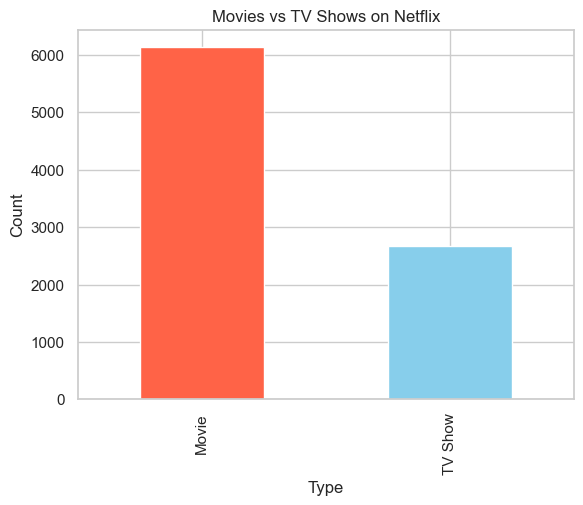

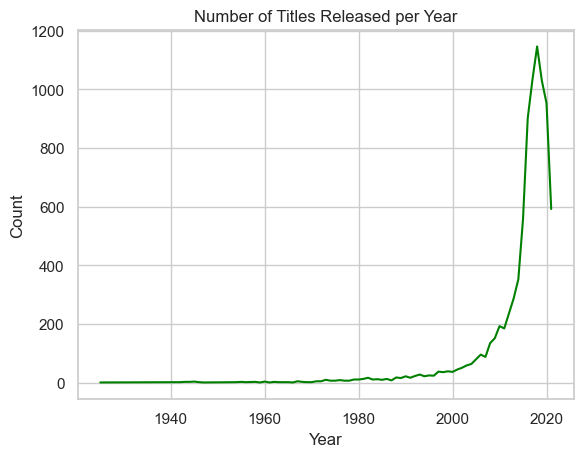

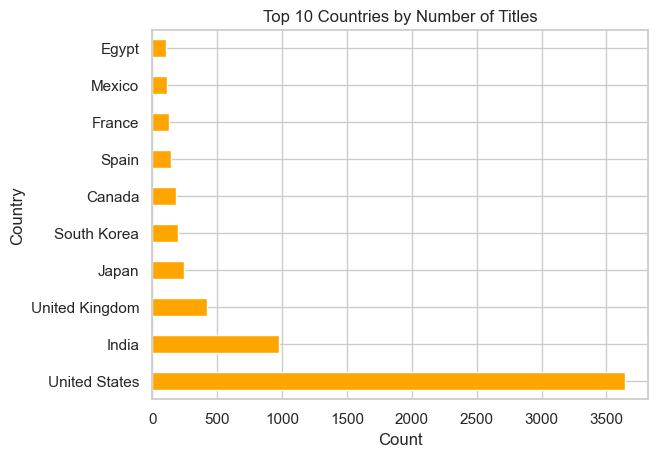

In [14]:
df['type'].value_counts().plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Titles released over the years
df['release_year'].value_counts().sort_index().plot(kind='line', color='green')
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 3. Top 10 countries by number of titles
df['country'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Insights :

1. Movies dominate the Netflix catalog compared to TV Shows.

2. A sharp increase in releases after 2015 reflects Netflix’s expansion era.

3. The U.S., India, and U.K. are top contributors to Netflix’s content library.

C:\Users\dell\AppData\Local\Temp\ipykernel_42412\3777417972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette=['#FF6F61', '#6BAED6'])


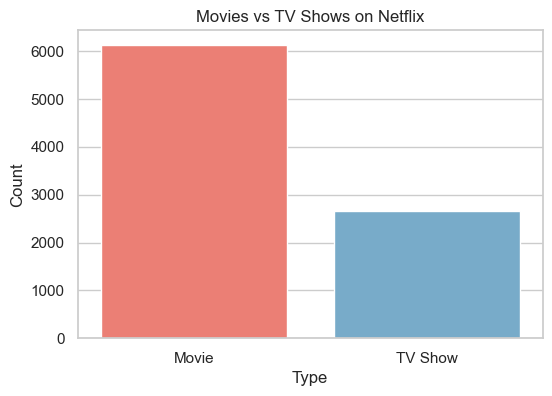

In [15]:
sns.set(style='whitegrid', palette='pastel')

# 1. Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette=['#FF6F61', '#6BAED6'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

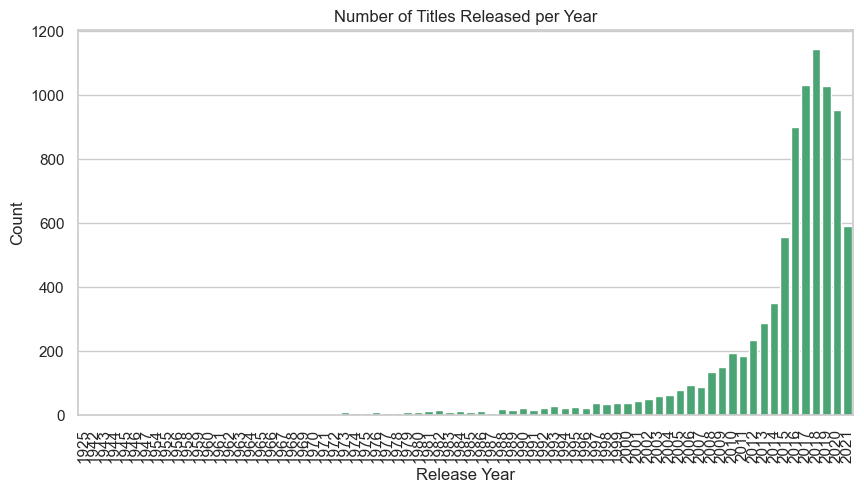

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='release_year', color='mediumseagreen', order=sorted(df['release_year'].unique()))
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_42412\1303316009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='autumn')


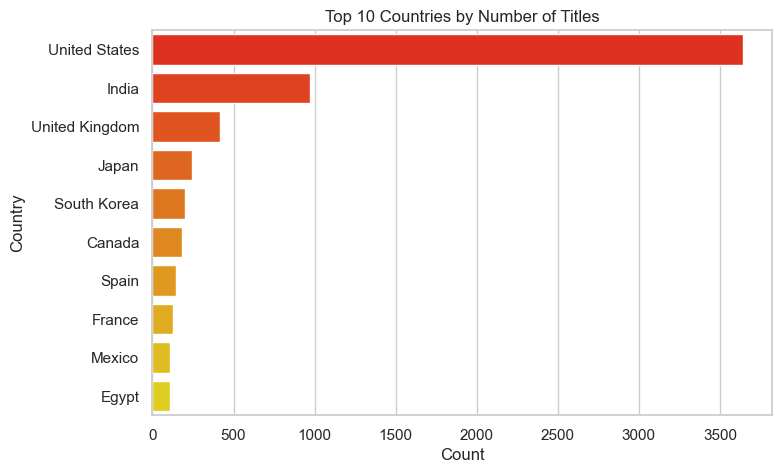

In [17]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='autumn')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Insights :

1. Movies make up the majority of Netflix’s content library.

2. The number of titles rises sharply after 2015, showing Netflix’s rapid growth.

3. United States, India, and United Kingdom contribute the most titles globally.

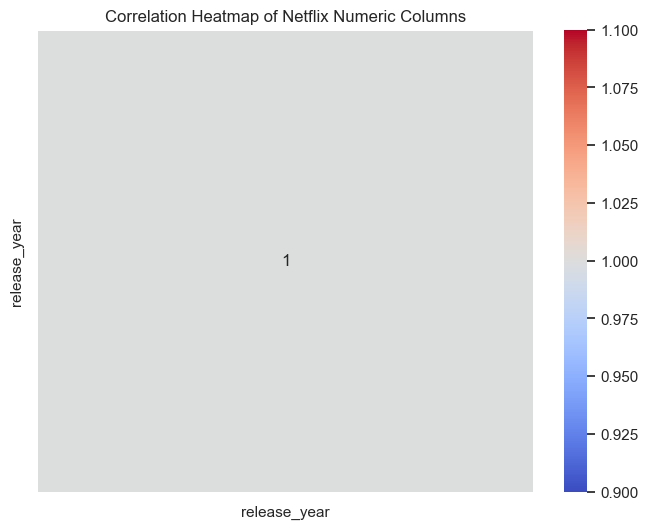

In [21]:
corr_netflix = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_netflix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Netflix Numeric Columns')
plt.show()

### Insights :

1. Shows the relationship between numeric columns like release_year and duration.

2. Positive correlation → variables increase together; negative → inverse relationship.

3. Near zero → weak or no linear relationship.

4. Helps identify trends, e.g., whether newer shows/movies are longer or how numeric ratings relate to other features.